In [ ]:
#This script is generate the pixel intensity sum as a surrogate marker for optical density

In [1]:
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import math

In [52]:
# Read the CSV file containing image file paths
image_paths_df = pd.read_csv('/home/sliu/Data/Backscatter/Data/img_filpath_od.csv')

/tmp/ipykernel_1584672/2389902084.py:2: DtypeWarning: Columns (0,1,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,1330,1333,1335,1336,1338,1342,1348,1349,1350,1355,1358,1359,1360,1362,1365,1366,1367,1369,1370) have mixed types. Specify dtype option on import or set low_memory=False.
  image_paths_df = pd.read_csv('/home/sliu/Data/Backscatter/Data/img_filpath_od.csv')


In [53]:
#save the column names as a text file
image_paths_df.columns.to_list()

['TestID',
 'ImageID',
 'FilePath',
 'FileType',
 'Resolution',
 'PID',
 'pat_key',
 'surgeon_name',
 'supervising_surgeon_name',
 'assistant_name',
 'event_date',
 'sex_name',
 'dob',
 'intended_procedure_list',
 'procedure_list',
 'op_note_comments',
 'diagnosis_list_o',
 'diagnosis_list',
 'diagnosis',
 'eye_name',
 'patients_birthdate',
 'study_id',
 'patients_age',
 'laterality',
 'acquisition_date',
 'acquisition_time',
 'group_name',
 'opd_front_diam_2_radius',
 'opd_front_diam_2_diameter',
 'opd_front_diam_2_wf_coeff_0',
 'opd_front_diam_2_wf_coeff_1',
 'opd_front_diam_2_wf_coeff_2',
 'opd_front_diam_2_wf_coeff_3',
 'opd_front_diam_2_wf_coeff_4',
 'opd_front_diam_2_wf_coeff_5',
 'opd_front_diam_2_wf_coeff_6',
 'opd_front_diam_2_wf_coeff_7',
 'opd_front_diam_2_wf_coeff_8',
 'opd_front_diam_2_wf_coeff_9',
 'opd_front_diam_2_wf_coeff_10',
 'opd_front_diam_2_wf_coeff_11',
 'opd_front_diam_2_wf_coeff_12',
 'opd_front_diam_2_wf_coeff_13',
 'opd_front_diam_2_wf_coeff_14',
 'opd_front_

In [54]:
# Define ROI coordinates
roi_top = 100
roi_bottom = 900
roi_left = 0
roi_right = 550

# Initialize a list to store pixel intensity sums
intensity_sums = []

In [55]:
# Initialize a dictionary to store results
intensity_results = {}

# Loop through image paths
for index, row in image_paths_df.iterrows():
    image_path = row['FilePath']
    file_type = row['FileType']
    
    # Check if the file type is 'image/jpeg'
    if file_type == 'image/jpeg':
        # Load the image
        img = cv.imread(image_path, 0)  # Load image as grayscale
        
        if img is not None:
            # Extract the ROI
            roi = img[roi_top:roi_bottom, roi_left:roi_right]
            
            # Calculate the pixel intensity sum within the ROI
            intensity_sum = np.sum(roi)
            
            # Store the result in the dictionary
            intensity_results[image_path] = intensity_sum
        else:
            print(f"Failed to load image: {image_path}")
    else:
        print(f"Skipping non-JPEG file: {image_path}")

# Print or use the results
for image_path, intensity_sum in intensity_results.items():
    print(f"Image Path: {image_path}, Intensity Sum: {intensity_sum}")

Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.vlt
Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/examinfo.xml
Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.rng
Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.cal
Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.scc
Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.sce
Skipping

Premature end of JPEG file


Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/9e96b1bd-9622-4473-bce0-1d66fb3af843/0c85a89b-47f6-4184-8bc1-12f88ba701c3/0c85a89b-47f6-4184-8bc1-12f88ba701c3.cal
Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/9e96b1bd-9622-4473-bce0-1d66fb3af843/0c85a89b-47f6-4184-8bc1-12f88ba701c3/examinfo.xml
Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/9e96b1bd-9622-4473-bce0-1d66fb3af843/0c85a89b-47f6-4184-8bc1-12f88ba701c3/0c85a89b-47f6-4184-8bc1-12f88ba701c3.rng
Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/9e96b1bd-9622-4473-bce0-1d66fb3af843/0c85a89b-47f6-4184-8bc1-12f88ba701c3/0c85a89b-47f6-4184-8bc1-12f88ba701c3.vlt
Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/9e96b1bd-9622-4473-bce0-1d66fb3af843/0c85a89b-47f6-4184-8bc1-12f88ba701c3/0c85a89b-47f6-4184-8bc1-12f88ba701c3.mes
Skipping non-JPEG file: /mnt/scratch/mehphoenix/Images/9e96b1bd-9622-4473-bce0-1d66fb3af843/0c85a89b-47f6-4184-8bc1-12f88ba701c3/0c85a89b-47f6-4184-8bc1-12f88ba701c3.sce
Skipping

Corrupt JPEG data: premature end of data segment
Premature end of JPEG file


Image Path: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.00, Intensity Sum: 12804038
Image Path: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.cso, Intensity Sum: 17108984
Image Path: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.irs, Intensity Sum: 19419214
Image Path: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.08, Intensity Sum: 15737218
Image Path: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.10, Intensity Sum: 15641439
Image Path: /mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0

In [57]:
intensity_results

{'/mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.00': 12804038,
 '/mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.cso': 17108984,
 '/mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.irs': 19419214,
 '/mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.08': 15737218,
 '/mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.10': 15641439,
 '/mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.01': 12883156,
 '/mnt/scratch/mehphoenix/Images/00436162-2a

In [58]:
# Create a new DataFrame based on image_paths_df and add the 'IntensitySum' column
img_int= image_paths_df.copy()
img_int['IntensitySum'] = img_int['FilePath'].map(intensity_results)

In [59]:
#Save it as a csv file, containing Patient info, DMEK info, OCT measurements, Image paths, and intensity sums
img_int.to_csv('/home/sliu/Data/Backscatter/Output/pix_int.csv', index=False)


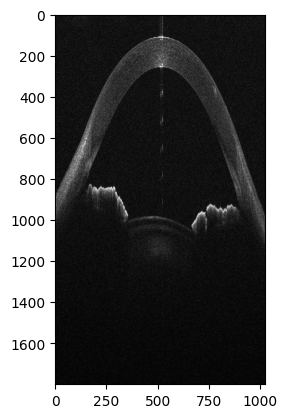

In [72]:
path = "/scratch/mehphoenix/Private/Images/0a0c4e54-d501-4c32-acb9-428ff17f527e/0fb1eaec-77a3-4603-bb45-9a4d879c236c/0fb1eaec-77a3-4603-bb45-9a4d879c236c.00"
arr = np.asarray(Image.open(path))
im = plt.imshow(arr)

In [35]:
img = cv.imread(path,0)


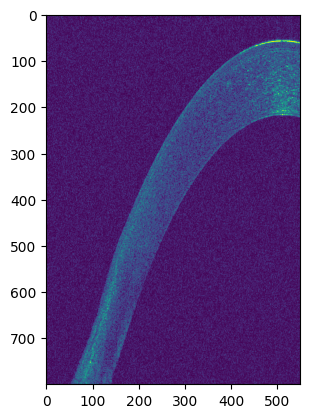

In [36]:
roi1 = img[100:900, 0:550]
plt.imshow(roi1)

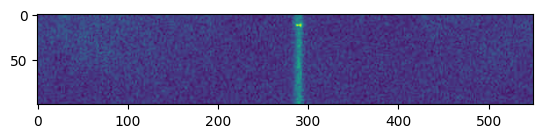

In [28]:
roi2 = img[0:100, 0:550]
plt.imshow(roi2)

In [29]:
np.sum(roi2)

1220657

In [11]:
y = 100 
x = 200
intensity = img[y, x]

In [43]:
#Trial of feature matching by openCV
img1 = cv.imread(path, cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread("/mnt/scratch/mehphoenix/Images/0185f9c0-5875-4f2c-a266-961cd462a460/81920bb7-e7e0-4dc2-b268-deaf9eee1e4c/81920bb7-e7e0-4dc2-b268-deaf9eee1e4c.08", cv.IMREAD_GRAYSCALE) # trainImage

In [44]:
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

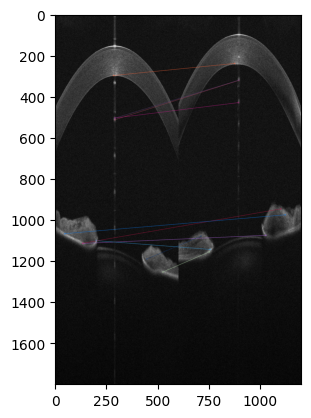

(<matplotlib.image.AxesImage at 0x7fe83c4530d0>, None)

In [45]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [72]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


In [73]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

In [74]:
# Apply David Lowe's ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

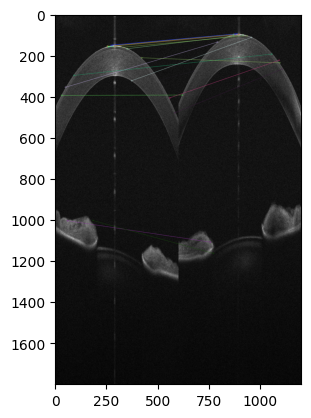

(<matplotlib.image.AxesImage at 0x7fe83c28f490>, None)

In [80]:
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

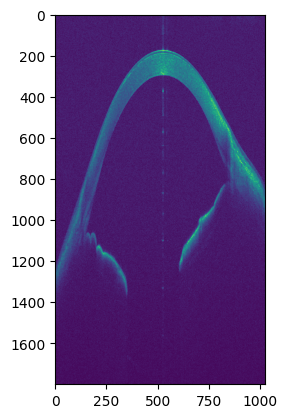

In [77]:
#Now apply the feature matching to an untrained image
img4 = cv.imread("/mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.00", cv.IMREAD_GRAYSCALE) # untrainedImage
plt.imshow(img4)

In [79]:
# Estimate homography using matched keypoints
homography_matrix, _ = cv.findHomography(np.float32([kp1[m[0].queryIdx].pt for m in good]).reshape(-1, 1, 2),
                                           np.float32([kp2[m[0].trainIdx].pt for m in good]).reshape(-1, 1, 2))


In [19]:
#Try with segmentation by Watershed algorithm instead
#Trial with Img4
img4 = cv.imread("/mnt/scratch/mehphoenix/Images/00436162-2a87-4946-9bc2-922fa9bface2/08940cf0-9bf6-4392-9552-b1ee25da9fef/08940cf0-9bf6-4392-9552-b1ee25da9fef.00")
assert img4 is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img4,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [20]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=1)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [21]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [23]:
markers = cv.watershed(img4,markers)
img4[markers == -1] = [255,0,0]

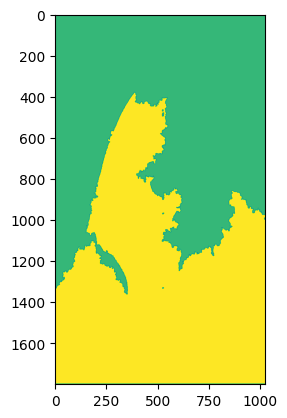

In [24]:
plt.imshow(markers)

In [39]:
##Now trial with gra/cut algorithm on OpenCV
#Trial with Img4
img4 = cv.imread("/mnt/scratch/mehphoenix/Images/0185f9c0-5875-4f2c-a266-961cd462a460/81920bb7-e7e0-4dc2-b268-deaf9eee1e4c/81920bb7-e7e0-4dc2-b268-deaf9eee1e4c.00")
assert img4 is not None, "file could not be read, check with os.path.exists()"
mask = np.zeros(img4.shape[:2],np.uint8)


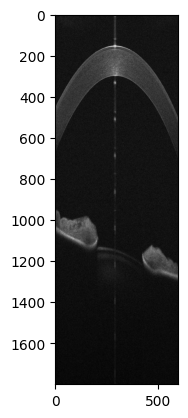

In [41]:
plt.imshow(img4)

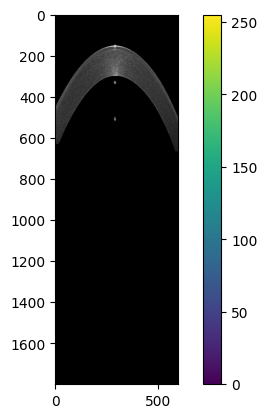

(<matplotlib.image.AxesImage at 0x7fc25023a950>,
 None)

In [40]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0,100,1000,800)
cv.grabCut(img4,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img4*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()